In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
string

'clientid:41b65b653f8548c1815431d54a305990\nclientsecret:918beac42fd848b58c000da5a853fbde'

In [5]:
string.split('\n')

['clientid:41b65b653f8548c1815431d54a305990',
 'clientsecret:918beac42fd848b58c000da5a853fbde']

In [6]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [7]:
secrets_dict

{'clientid': '41b65b653f8548c1815431d54a305990',
 'clientsecret': '918beac42fd848b58c000da5a853fbde'}

In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

# Playlist_1

In [9]:
playlist_id = "1G8IpkZKobrIlXcVPoSIuf"
playlist = sp.user_playlist_tracks("spotify", "1G8IpkZKobrIlXcVPoSIuf")

In [10]:
playlist["total"]

10000

In [11]:
playlist["items"]

[{'added_at': '2020-11-29T15:02:07Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/acclaimedmusic'},
   'href': 'https://api.spotify.com/v1/users/acclaimedmusic',
   'id': 'acclaimedmusic',
   'type': 'user',
   'uri': 'spotify:user:acclaimedmusic'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74ASZWbe4lXaubB36ztrGX'},
      'href': 'https://api.spotify.com/v1/artists/74ASZWbe4lXaubB36ztrGX',
      'id': '74ASZWbe4lXaubB36ztrGX',
      'name': 'Bob Dylan',
      'type': 'artist',
      'uri': 'spotify:artist:74ASZWbe4lXaubB36ztrGX'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'H

In [12]:
len(playlist["items"])

100

In [13]:
playlist['next']

'https://api.spotify.com/v1/playlists/1G8IpkZKobrIlXcVPoSIuf/tracks?offset=100&limit=100&additional_types=track'

In [14]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [15]:
all_tracks = get_playlist_tracks("1G8IpkZKobrIlXcVPoSIuf")
len(all_tracks)

10000

In [16]:
import pandas as pd
from pandas import json_normalize

In [17]:
tracks = json_normalize(all_tracks)

In [18]:
tracks.head()

added_at  is_local primary_color  \
0  2020-11-29T15:02:07Z     False          None   
1  2020-11-29T15:02:07Z     False          None   
2  2020-11-29T15:02:07Z     False          None   
3  2020-11-29T15:02:07Z     False          None   
4  2020-11-29T15:02:07Z     False          None   

                 added_by.external_urls.spotify  \
0  https://open.spotify.com/user/acclaimedmusic   
1  https://open.spotify.com/user/acclaimedmusic   
2  https://open.spotify.com/user/acclaimedmusic   
3  https://open.spotify.com/user/acclaimedmusic   
4  https://open.spotify.com/user/acclaimedmusic   

                                     added_by.href     added_by.id  \
0  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
1  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
2  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
3  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
4  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   

  added_by.type                 added_by.uri track.album.album_type  \
0          user  spotify:user:acclaimedmusic                  album   
1          user  spotify:user:acclaimedmusic                  album   
2          user  spotify:user:acclaimedmusic                  album   
3          user  spotify:user:acclaimedmusic                  album   
4          user  spotify:user:acclaimedmusic            compilation   

                                 track.album.artists  ... track.is_local  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...          False   
1  [{'external_urls': {'spotify': 'https://open.s...  ...          False   
2  [{'external_urls': {'spotify': 'https://open.s...  ...          False   
3  [{'external_urls': {'spotify': 'https://open.s...  ...          False   
4  [{'external_urls': {'spotify': 'https://open.s...  ...          False   

                       track.name track.popularity  \
0            Like a Rolling Stone             71.0   
1         Smells Like Teen Spirit              0.0   
2  A Day In The Life - Remastered              0.0   
3          Good Vibrations (Mono)             22.0   
4                  Johnny B Goode              0.0   

                                   track.preview_url track.track  \
0  https://p.scdn.co/mp3-preview/d48c45e3194cfe07...        True   
1                                               None        True   
2                                               None        True   
3                                               None        True   
4                                               None        True   

  track.track_number track.type                             track.uri  \
0                1.0      track  spotify:track:3AhXZa8sUQht0UEdBJgpGc   
1                1.0      track  spotify:track:3oTlkzk1OtrhH8wBAduVEi   
2               13.0      track  spotify:track:3ZFBeIyP41HhnALjxWy1pR   
3                6.0      track  spotify:track:5Qt4Cc66g24QWwGP3YYV9y   
4                6.0      track  spotify:track:7MH2ZclofPlTrZOkPzZKhK   

   video_thumbnail.url track  
0                 None   NaN  
1                 None   NaN  
2                 None   NaN  
3                 None   NaN  
4                 None   NaN  

[5 rows x 41 columns]

In [19]:
#import pandas as pd

# Iterate over the 'track.artists' column to analyze its structure
#for value in tracks['track.artists']:
    #if isinstance(value, list):
        # If the value is a list, it might contain multiple items.
        # You can further examine the elements in the list.
        #print("List found:")
        #for item in value:
            #if isinstance(item, dict):
                # If an element is a dictionary, it might represent a nested structure.
                # You can print and analyze the dictionary keys/values.
                #print("Dictionary found:")
                #for key, val in item.items():
                    #print(f"Key: {key}, Value Type: {type(val)}")
            #else:
                # If an element is not a dictionary, you can print its type.
                #print(f"Element Type: {type(item)}")
    #elif isinstance(value, dict):
        # If the value is a dictionary, it might represent a single nested structure.
        # You can print and analyze the dictionary keys/values.
        #print("Dictionary found:")
        #for key, val in value.items():
            #print(f"Key: {key}, Value Type: {type(val)}")
    #else:
        # If it's not a list or dictionary, you can print its type.
        #print(f"Value Type: {type(value)}")


In [20]:
def expand_list_dict2(row):
    artists_data = row['track.artists']
    if isinstance(artists_data, list):  # Check if it's a list
        artists_data = [artist for artist in artists_data if isinstance(artist, dict)]  # Filter out non-dictionaries
        if artists_data:  # Check if there's any artist data present
            df = json_normalize(artists_data)
            df['song_id'] = row['track.id']
            return df
    return None  # Return None if it's not a list or has no valid artist data

In [21]:
tracks['artists_dfs'] = tracks.apply(expand_list_dict2, axis=1)

In [22]:
tracks['artists_dfs'][2]

href                      id  \
0  https://api.spotify.com/v1/artists/3WrFJ7ztbog...  3WrFJ7ztbogyGnTHbHJFl2   

          name    type                                    uri  \
0  The Beatles  artist  spotify:artist:3WrFJ7ztbogyGnTHbHJFl2   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/3WrFJ7ztbogyGn...  3ZFBeIyP41HhnALjxWy1pR

In [23]:
artist_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks['artists_dfs']:
    #display(val)
    artist_df = pd.concat([artist_df, mini_df], axis=0)
    
artist_df

href                      id  \
0   https://api.spotify.com/v1/artists/74ASZWbe4lX...  74ASZWbe4lXaubB36ztrGX   
0   https://api.spotify.com/v1/artists/6olE6TJLqED...  6olE6TJLqED3rqDCT0FyPh   
0   https://api.spotify.com/v1/artists/3WrFJ7ztbog...  3WrFJ7ztbogyGnTHbHJFl2   
0   https://api.spotify.com/v1/artists/3oDbviiivRW...  3oDbviiivRWhXwIE8hxkVV   
0   https://api.spotify.com/v1/artists/293zczrfYaf...  293zczrfYafIItmnmM3coR   
..                                                ...                     ...   
0   https://api.spotify.com/v1/artists/2vwI9jlKSgJ...  2vwI9jlKSgJbne3dlTzaLO   
0   https://api.spotify.com/v1/artists/7xTKLpo7UCz...  7xTKLpo7UCzXSnlH7fOIoM   
0   https://api.spotify.com/v1/artists/6nB0iY1cjSY...  6nB0iY1cjSY1KyhYyuIIKH   
0   https://api.spotify.com/v1/artists/3LrsctPHK5w...  3LrsctPHK5wMdvEqvFN8BW   
0   https://api.spotify.com/v1/artists/1SQRv42e4Pj...  1SQRv42e4PjEYfPhS0Tk9E   

                      name    type                                    uri  \
0                Bob Dylan  artist  spotify:artist:74ASZWbe4lXaubB36ztrGX   
0                  Nirvana  artist  spotify:artist:6olE6TJLqED3rqDCT0FyPh   
0              The Beatles  artist  spotify:artist:3WrFJ7ztbogyGnTHbHJFl2   
0           The Beach Boys  artist  spotify:artist:3oDbviiivRWhXwIE8hxkVV   
0              Chuck Berry  artist  spotify:artist:293zczrfYafIItmnmM3coR   
..                     ...     ...                                    ...   
0                    Skids  artist  spotify:artist:2vwI9jlKSgJbne3dlTzaLO   
0                   Redman  artist  spotify:artist:7xTKLpo7UCzXSnlH7fOIoM   
0                FKA twigs  artist  spotify:artist:6nB0iY1cjSY1KyhYyuIIKH   
0   The Mighty Lemon Drops  artist  spotify:artist:3LrsctPHK5wMdvEqvFN8BW   
0                The Kinks  artist  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E   

                                external_urls.spotify                 song_id  
0   https://open.spotify.com/artist/74ASZWbe4lXaub...  3AhXZa8sUQht0UEdBJgpGc  
0   https://open.spotify.com/artist/6olE6TJLqED3rq...  3oTlkzk1OtrhH8wBAduVEi  
0   https://open.spotify.com/artist/3WrFJ7ztbogyGn...  3ZFBeIyP41HhnALjxWy1pR  
0   https://open.spotify.com/artist/3oDbviiivRWhXw...  5Qt4Cc66g24QWwGP3YYV9y  
0   https://open.spotify.com/artist/293zczrfYafIIt...  7MH2ZclofPlTrZOkPzZKhK  
..                                                ...                     ...  
0   https://open.spotify.com/artist/2vwI9jlKSgJbne...  2QSD3K3b3BJ8DPhGhQfDPW  
0   https://open.spotify.com/artist/7xTKLpo7UCzXSn...  49XnDVsYOHgV4gFZeCojKj  
0   https://open.spotify.com/artist/6nB0iY1cjSY1Ky...  5Y9IIH8Xmo1nuk0gfFjc4Q  
0   https://open.spotify.com/artist/3LrsctPHK5wMdv...  0ya0JYEFoXNviB8RMeHDtW  
0   https://open.spotify.com/artist/1SQRv42e4PjEYf...  32y1kRg6IF3f6jpkHxzFoK  

[10977 rows x 7 columns]

In [24]:
df_merged = pd.merge(left=tracks,
                    right=artist_df,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged.head()

added_at  is_local primary_color  \
0  2020-11-29T15:02:07Z     False          None   
1  2020-11-29T15:02:07Z     False          None   
2  2020-11-29T15:02:07Z     False          None   
3  2020-11-29T15:02:07Z     False          None   
4  2020-11-29T15:02:07Z     False          None   

                 added_by.external_urls.spotify  \
0  https://open.spotify.com/user/acclaimedmusic   
1  https://open.spotify.com/user/acclaimedmusic   
2  https://open.spotify.com/user/acclaimedmusic   
3  https://open.spotify.com/user/acclaimedmusic   
4  https://open.spotify.com/user/acclaimedmusic   

                                     added_by.href     added_by.id  \
0  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
1  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
2  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
3  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   
4  https://api.spotify.com/v1/users/acclaimedmusic  acclaimedmusic   

  added_by.type                 added_by.uri track.album.album_type  \
0          user  spotify:user:acclaimedmusic                  album   
1          user  spotify:user:acclaimedmusic                  album   
2          user  spotify:user:acclaimedmusic                  album   
3          user  spotify:user:acclaimedmusic                  album   
4          user  spotify:user:acclaimedmusic            compilation   

                                 track.album.artists  ... video_thumbnail.url  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...                None   
1  [{'external_urls': {'spotify': 'https://open.s...  ...                None   
2  [{'external_urls': {'spotify': 'https://open.s...  ...                None   
3  [{'external_urls': {'spotify': 'https://open.s...  ...                None   
4  [{'external_urls': {'spotify': 'https://open.s...  ...                None   

  track                                        artists_dfs  \
0   NaN                                                ...   
1   NaN                                                ...   
2   NaN                                                ...   
3   NaN                                                ...   
4   NaN                                                ...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/74ASZWbe4lX...  74ASZWbe4lXaubB36ztrGX   
1  https://api.spotify.com/v1/artists/6olE6TJLqED...  6olE6TJLqED3rqDCT0FyPh   
2  https://api.spotify.com/v1/artists/3WrFJ7ztbog...  3WrFJ7ztbogyGnTHbHJFl2   
3  https://api.spotify.com/v1/artists/3oDbviiivRW...  3oDbviiivRWhXwIE8hxkVV   
4  https://api.spotify.com/v1/artists/293zczrfYaf...  293zczrfYafIItmnmM3coR   

             name    type                                    uri  \
0       Bob Dylan  artist  spotify:artist:74ASZWbe4lXaubB36ztrGX   
1         Nirvana  artist  spotify:artist:6olE6TJLqED3rqDCT0FyPh   
2     The Beatles  artist  spotify:artist:3WrFJ7ztbogyGnTHbHJFl2   
3  The Beach Boys  artist  spotify:artist:3oDbviiivRWhXwIE8hxkVV   
4     Chuck Berry  artist  spotify:artist:293zczrfYafIItmnmM3coR   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/74ASZWbe4lXaub...  3AhXZa8sUQht0UEdBJgpGc  
1  https://open.spotify.com/artist/6olE6TJLqED3rq...  3oTlkzk1OtrhH8wBAduVEi  
2  https://open.spotify.com/artist/3WrFJ7ztbogyGn...  3ZFBeIyP41HhnALjxWy1pR  
3  https://open.spotify.com/artist/3oDbviiivRWhXw...  5Qt4Cc66g24QWwGP3YYV9y  
4  https://open.spotify.com/artist/293zczrfYafIIt...  7MH2ZclofPlTrZOkPzZKhK  

[5 rows x 49 columns]

In [25]:
df_final = df_merged[['track.name', 'name', 'song_id']]
df_final

track.name                    name  \
0                Like a Rolling Stone               Bob Dylan   
1             Smells Like Teen Spirit                 Nirvana   
2      A Day In The Life - Remastered             The Beatles   
3              Good Vibrations (Mono)          The Beach Boys   
4                      Johnny B Goode             Chuck Berry   
...                               ...                     ...   
13624                 Into The Valley                   Skids   
13625              Tonight's Da Night                  Redman   
13626                        Figure 8               FKA twigs   
13627                   Like An Angel  The Mighty Lemon Drops   
13628                    Come Dancing               The Kinks   

                      song_id  
0      3AhXZa8sUQht0UEdBJgpGc  
1      3oTlkzk1OtrhH8wBAduVEi  
2      3ZFBeIyP41HhnALjxWy1pR  
3      5Qt4Cc66g24QWwGP3YYV9y  
4      7MH2ZclofPlTrZOkPzZKhK  
...                       ...  
13624  2QSD3K3b3BJ8DPhGhQfDPW  
13625  49XnDVsYOHgV4gFZeCojKj  
13626  5Y9IIH8Xmo1nuk0gfFjc4Q  
13627  0ya0JYEFoXNviB8RMeHDtW  
13628  32y1kRg6IF3f6jpkHxzFoK  

[13629 rows x 3 columns]

# Playlist_2

In [26]:
playlist_id_2 = "5xqpyfZyS1DVysoevdVyEn"
playlist_2 = sp.user_playlist_tracks("spotify", "5xqpyfZyS1DVysoevdVyEn")

In [27]:
playlist_2["total"]

10991

In [28]:
playlist_2["items"]

[{'added_at': '2016-04-13T17:09:41Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/secretagentfrog'},
   'href': 'https://api.spotify.com/v1/users/secretagentfrog',
   'id': 'secretagentfrog',
   'type': 'user',
   'uri': 'spotify:user:secretagentfrog'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xU878Z1QtBldR7ru9owdU'},
      'href': 'https://api.spotify.com/v1/artists/1xU878Z1QtBldR7ru9owdU',
      'id': '1xU878Z1QtBldR7ru9owdU',
      'name': 'Phoenix',
      'type': 'artist',
      'uri': 'spotify:artist:1xU878Z1QtBldR7ru9owdU'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     

In [29]:
len(playlist_2["items"])

100

In [30]:
playlist_2['next']

'https://api.spotify.com/v1/playlists/5xqpyfZyS1DVysoevdVyEn/tracks?offset=100&limit=100&additional_types=track'

In [31]:
#from random import randint
#from time import sleep

#def get_playlist_tracks(playlist_id_2):
    #results_2 = sp.user_playlist_tracks("spotify",playlist_id_2)
    #tracks_2 = results_2['items']
    #while results_2['next']!=None:
        #results_2 = sp.next(results)
        #tracks_2 = tracks + results['items']
        #sleep(randint(1,3000)/1000) # respectful nap
    #return tracks_2

In [32]:
all_tracks_2 = get_playlist_tracks("5xqpyfZyS1DVysoevdVyEn")
len(all_tracks_2)

10991

In [33]:
import pandas as pd
from pandas import json_normalize

In [34]:
tracks_2 = json_normalize(all_tracks_2)

In [35]:
tracks_2.head()

added_at  is_local primary_color  \
0  2016-04-13T17:09:41Z     False          None   
1  2016-04-13T17:09:41Z     False          None   
2  2016-04-13T17:09:41Z     False          None   
3  2016-04-13T17:09:41Z     False          None   
4  2016-04-13T17:09:41Z     False          None   

                  added_by.external_urls.spotify  \
0  https://open.spotify.com/user/secretagentfrog   
1  https://open.spotify.com/user/secretagentfrog   
2  https://open.spotify.com/user/secretagentfrog   
3  https://open.spotify.com/user/secretagentfrog   
4  https://open.spotify.com/user/secretagentfrog   

                                      added_by.href      added_by.id  \
0  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
1  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
2  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
3  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
4  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   

  added_by.type                  added_by.uri track.album.album_type  \
0          user  spotify:user:secretagentfrog                  album   
1          user  spotify:user:secretagentfrog                 single   
2          user  spotify:user:secretagentfrog                  album   
3          user  spotify:user:secretagentfrog                  album   
4          user  spotify:user:secretagentfrog                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                 track.id track.is_local                track.name  \
0  3AA8xNhDC0MpqwkGX3EP5V          False     If I Ever Feel Better   
1  2i8lRhmZNKaM1ypHwRybuD          False  Dance To The Underground   
2  4flxgPC0426CEeSrzQIic0          False                 How We Do   
3  1XHFob24QklIXtLRopKirJ          False        Fuck the Pain Away   
4  4JB847zlgViLq8tJIzRsZy          False          Street Surgery 2   

  track.popularity                                  track.preview_url  \
0               66  https://p.scdn.co/mp3-preview/eb1e1d7972172e23...   
1               29  https://p.scdn.co/mp3-preview/bf9953e29d806a33...   
2               34  https://p.scdn.co/mp3-preview/7b8c0e7b8498eaf4...   
3                0                                               None   
4                0                                               None   

  track.track track.track_number track.type  \
0        True                  4      track   
1        True                  1      track   
2        True                  1      track   
3        True                  1      track   
4        True                  4      track   

                              track.uri video_thumbnail.url  
0  spotify:track:3AA8xNhDC0MpqwkGX3EP5V                None  
1  spotify:track:2i8lRhmZNKaM1ypHwRybuD                None  
2  spotify:track:4flxgPC0426CEeSrzQIic0                None  
3  spotify:track:1XHFob24QklIXtLRopKirJ                None  
4  spotify:track:4JB847zlgViLq8tJIzRsZy                None  

[5 rows x 40 columns]

In [36]:
#import pandas as pd

# Iterate over the 'track.artists' column to analyze its structure
#for value in tracks['track.artists']:
    #if isinstance(value, list):
        # If the value is a list, it might contain multiple items.
        # You can further examine the elements in the list.
        #print("List found:")
        #for item in value:
            #if isinstance(item, dict):
                # If an element is a dictionary, it might represent a nested structure.
                # You can print and analyze the dictionary keys/values.
                #print("Dictionary found:")
                #for key, val in item.items():
                    #print(f"Key: {key}, Value Type: {type(val)}")
            #else:
                # If an element is not a dictionary, you can print its type.
                #print(f"Element Type: {type(item)}")
    #elif isinstance(value, dict):
        # If the value is a dictionary, it might represent a single nested structure.
        # You can print and analyze the dictionary keys/values.
        #print("Dictionary found:")
        #for key, val in value.items():
            #print(f"Key: {key}, Value Type: {type(val)}")
    #else:
        # If it's not a list or dictionary, you can print its type.
        #print(f"Value Type: {type(value)}")


In [37]:
#def expand_list_dict2(row):
    #artists_data = row['track.artists']
    #if isinstance(artists_data, list):  # Check if it's a list
        #artists_data = [artist for artist in artists_data if isinstance(artist, dict)]  # Filter out non-dictionaries
        #if artists_data:  # Check if there's any artist data present
            #df = json_normalize(artists_data)
            #df['song_id'] = row['track.id']
            #return df
    #return None  # Return None if it's not a list or has no valid artist data

In [38]:
tracks_2['artists_dfs'] = tracks_2.apply(expand_list_dict2, axis=1)

In [39]:
tracks_2['artists_dfs'][2]

href                      id  \
0  https://api.spotify.com/v1/artists/2UyhhfLOvfL...  2UyhhfLOvfLs7ZhzsAaNC3   

         name    type                                    uri  \
0  Mount Sims  artist  spotify:artist:2UyhhfLOvfLs7ZhzsAaNC3   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/2UyhhfLOvfLs7Z...  4flxgPC0426CEeSrzQIic0

In [40]:
artist_df_2 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df in tracks_2['artists_dfs']:
    #display(val)
    artist_df_2 = pd.concat([artist_df_2, mini_df], axis=0)
    
artist_df_2

href                      id  \
0   https://api.spotify.com/v1/artists/1xU878Z1QtB...  1xU878Z1QtBldR7ru9owdU   
0   https://api.spotify.com/v1/artists/2oWyxHNcxMc...  2oWyxHNcxMcrvNIHMX2apR   
0   https://api.spotify.com/v1/artists/2UyhhfLOvfL...  2UyhhfLOvfLs7ZhzsAaNC3   
0   https://api.spotify.com/v1/artists/1gkSl4XpHIH...  1gkSl4XpHIHI4I1WQbfXOE   
0   https://api.spotify.com/v1/artists/3GpAL7oEFD3...  3GpAL7oEFD37IJDOOiirqy   
..                                                ...                     ...   
0   https://api.spotify.com/v1/artists/4HpHDJqNFP3...  4HpHDJqNFP3XsGRy0SKTq4   
0   https://api.spotify.com/v1/artists/2sriRQRt36D...  2sriRQRt36DnfHtD68zZlj   
0   https://api.spotify.com/v1/artists/54QMjE4toDf...  54QMjE4toDfiCryzYWCpXX   
0   https://api.spotify.com/v1/artists/5wFXmYsg3KF...  5wFXmYsg3KFJ8BDsQudJ4f   
0   https://api.spotify.com/v1/artists/4LdZNE5MHGq...  4LdZNE5MHGqvc0N9ivXNF3   

                    name    type                                    uri  \
0                Phoenix  artist  spotify:artist:1xU878Z1QtBldR7ru9owdU   
0                Radio 4  artist  spotify:artist:2oWyxHNcxMcrvNIHMX2apR   
0             Mount Sims  artist  spotify:artist:2UyhhfLOvfLs7ZhzsAaNC3   
0                Peaches  artist  spotify:artist:1gkSl4XpHIHI4I1WQbfXOE   
0               Zongamin  artist  spotify:artist:3GpAL7oEFD37IJDOOiirqy   
..                   ...     ...                                    ...   
0            SLEEP RADIO  artist  spotify:artist:4HpHDJqNFP3XsGRy0SKTq4   
0         Dorian Concept  artist  spotify:artist:2sriRQRt36DnfHtD68zZlj   
0              Metronomy  artist  spotify:artist:54QMjE4toDfiCryzYWCpXX   
0   Manchester Orchestra  artist  spotify:artist:5wFXmYsg3KFJ8BDsQudJ4f   
0     The Joy Formidable  artist  spotify:artist:4LdZNE5MHGqvc0N9ivXNF3   

                                external_urls.spotify                 song_id  
0   https://open.spotify.com/artist/1xU878Z1QtBldR...  3AA8xNhDC0MpqwkGX3EP5V  
0   https://open.spotify.com/artist/2oWyxHNcxMcrvN...  2i8lRhmZNKaM1ypHwRybuD  
0   https://open.spotify.com/artist/2UyhhfLOvfLs7Z...  4flxgPC0426CEeSrzQIic0  
0   https://open.spotify.com/artist/1gkSl4XpHIHI4I...  1XHFob24QklIXtLRopKirJ  
0   https://open.spotify.com/artist/3GpAL7oEFD37IJ...  4JB847zlgViLq8tJIzRsZy  
..                                                ...                     ...  
0   https://open.spotify.com/artist/4HpHDJqNFP3XsG...  1v6vHkDHBjm4OHUzeOKber  
0   https://open.spotify.com/artist/2sriRQRt36DnfH...  5TN8n4LQS8Or2WEnU56pXs  
0   https://open.spotify.com/artist/54QMjE4toDfiCr...  6MEzr1cmAJi3FXBjXVXMnm  
0   https://open.spotify.com/artist/5wFXmYsg3KFJ8B...  6ovSjbBKatyx9KvWsxkAZo  
0   https://open.spotify.com/artist/4LdZNE5MHGqvc0...  6CO46FIr0FSGT0h0QXjpmH  

[12681 rows x 7 columns]

In [41]:
df_merged_2 = pd.merge(left=tracks_2,
                    right=artist_df_2,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged_2.head()

added_at  is_local primary_color  \
0  2016-04-13T17:09:41Z     False          None   
1  2016-04-13T17:09:41Z     False          None   
2  2016-04-13T17:09:41Z     False          None   
3  2016-04-13T17:09:41Z     False          None   
4  2016-04-13T17:09:41Z     False          None   

                  added_by.external_urls.spotify  \
0  https://open.spotify.com/user/secretagentfrog   
1  https://open.spotify.com/user/secretagentfrog   
2  https://open.spotify.com/user/secretagentfrog   
3  https://open.spotify.com/user/secretagentfrog   
4  https://open.spotify.com/user/secretagentfrog   

                                      added_by.href      added_by.id  \
0  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
1  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
2  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
3  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   
4  https://api.spotify.com/v1/users/secretagentfrog  secretagentfrog   

  added_by.type                  added_by.uri track.album.album_type  \
0          user  spotify:user:secretagentfrog                  album   
1          user  spotify:user:secretagentfrog                 single   
2          user  spotify:user:secretagentfrog                  album   
3          user  spotify:user:secretagentfrog                  album   
4          user  spotify:user:secretagentfrog                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                              track.uri video_thumbnail.url  \
0  spotify:track:3AA8xNhDC0MpqwkGX3EP5V                None   
1  spotify:track:2i8lRhmZNKaM1ypHwRybuD                None   
2  spotify:track:4flxgPC0426CEeSrzQIic0                None   
3  spotify:track:1XHFob24QklIXtLRopKirJ                None   
4  spotify:track:4JB847zlgViLq8tJIzRsZy                None   

                                         artists_dfs  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/1xU878Z1QtB...  1xU878Z1QtBldR7ru9owdU   
1  https://api.spotify.com/v1/artists/2oWyxHNcxMc...  2oWyxHNcxMcrvNIHMX2apR   
2  https://api.spotify.com/v1/artists/2UyhhfLOvfL...  2UyhhfLOvfLs7ZhzsAaNC3   
3  https://api.spotify.com/v1/artists/1gkSl4XpHIH...  1gkSl4XpHIHI4I1WQbfXOE   
4  https://api.spotify.com/v1/artists/3GpAL7oEFD3...  3GpAL7oEFD37IJDOOiirqy   

         name    type                                    uri  \
0     Phoenix  artist  spotify:artist:1xU878Z1QtBldR7ru9owdU   
1     Radio 4  artist  spotify:artist:2oWyxHNcxMcrvNIHMX2apR   
2  Mount Sims  artist  spotify:artist:2UyhhfLOvfLs7ZhzsAaNC3   
3     Peaches  artist  spotify:artist:1gkSl4XpHIHI4I1WQbfXOE   
4    Zongamin  artist  spotify:artist:3GpAL7oEFD37IJDOOiirqy   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/1xU878Z1QtBldR...  3AA8xNhDC0MpqwkGX3EP5V  
1  https://open.spotify.com/artist/2oWyxHNcxMcrvN...  2i8lRhmZNKaM1ypHwRybuD  
2  https://open.spotify.com/artist/2UyhhfLOvfLs7Z...  4flxgPC0426CEeSrzQIic0  
3  https://open.spotify.com/artist/1gkSl4XpHIHI4I...  1XHFob24QklIXtLRopKirJ  
4  https://open.spotify.com/artist/3GpAL7oEFD37IJ...  4JB847zlgViLq8tJIzRsZy  

[5 rows x 48 columns]

In [42]:
df_final_2 = df_merged_2[['track.name', 'name', 'song_id']]
df_final_2

track.name                  name  \
0            If I Ever Feel Better               Phoenix   
1         Dance To The Underground               Radio 4   
2                        How We Do            Mount Sims   
3               Fuck the Pain Away               Peaches   
4                 Street Surgery 2              Zongamin   
...                            ...                   ...   
12676  Hate Is an Attractive Force           SLEEP RADIO   
12677                     Promises        Dorian Concept   
12678                      16 Beat             Metronomy   
12679     Amplified In The Silence  Manchester Orchestra   
12680               The Wrong Side    The Joy Formidable   

                      song_id  
0      3AA8xNhDC0MpqwkGX3EP5V  
1      2i8lRhmZNKaM1ypHwRybuD  
2      4flxgPC0426CEeSrzQIic0  
3      1XHFob24QklIXtLRopKirJ  
4      4JB847zlgViLq8tJIzRsZy  
...                       ...  
12676  1v6vHkDHBjm4OHUzeOKber  
12677  5TN8n4LQS8Or2WEnU56pXs  
12678  6MEzr1cmAJi3FXBjXVXMnm  
12679  6ovSjbBKatyx9KvWsxkAZo  
12680  6CO46FIr0FSGT0h0QXjpmH  

[12681 rows x 3 columns]

# Playlist_3

In [43]:
playlist_id_3 = "1YL4XoegERoragv0RK2RC9"
playlist_3 = sp.user_playlist_tracks("spotify", "1YL4XoegERoragv0RK2RC9")

In [44]:
playlist_3["total"]

9998

In [45]:
playlist_3["items"]

[{'added_at': '2021-08-08T09:26:31Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/bradnumber1'},
   'href': 'https://api.spotify.com/v1/users/bradnumber1',
   'id': 'bradnumber1',
   'type': 'user',
   'uri': 'spotify:user:bradnumber1'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4qwGe91Bz9K2T8jXTZ815W'},
      'href': 'https://api.spotify.com/v1/artists/4qwGe91Bz9K2T8jXTZ815W',
      'id': '4qwGe91Bz9K2T8jXTZ815W',
      'name': 'Janet Jackson',
      'type': 'artist',
      'uri': 'spotify:artist:4qwGe91Bz9K2T8jXTZ815W'}],
    'available_markets': [],
    'external_urls': {'spotify': 'https://open.spotify.com/album/1azqhOR2G3aHiHTd3Rbn7L'},
    'href': 'https://api.spotify.com/v1/albums/1azqhOR2G3aHiHTd3Rbn7L',
    'id': '1azqhOR2G3aHiHTd3Rbn7L',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d

In [46]:
len(playlist_3["items"])

100

In [47]:
playlist_3['next']

'https://api.spotify.com/v1/playlists/1YL4XoegERoragv0RK2RC9/tracks?offset=100&limit=100&additional_types=track'

In [48]:
#from random import randint
#from time import sleep

#def get_playlist_tracks(playlist_id_3):
    #results_3 = sp.user_playlist_tracks("spotify",playlist_id_3)
    #tracks_3 = results['items']
    #while results_3['next']!=None:
        #results_3 = sp.next(results)
        #tracks_3 = tracks + results['items']
        #sleep(randint(1,3000)/1000) # respectful nap
    #return tracks

In [49]:
all_tracks_3 = get_playlist_tracks("1YL4XoegERoragv0RK2RC9")
len(all_tracks_3)

9998

In [50]:
import pandas as pd
from pandas import json_normalize

In [51]:
tracks_3 = json_normalize(all_tracks_3)

In [52]:
tracks_3.head()

added_at  is_local primary_color  \
0  2021-08-08T09:26:31Z     False          None   
1  2021-08-08T09:26:31Z     False          None   
2  2021-08-08T09:26:31Z     False          None   
3  2021-08-08T09:26:31Z     False          None   
4  2021-08-08T09:26:31Z     False          None   

              added_by.external_urls.spotify  \
0  https://open.spotify.com/user/bradnumber1   
1  https://open.spotify.com/user/bradnumber1   
2  https://open.spotify.com/user/bradnumber1   
3  https://open.spotify.com/user/bradnumber1   
4  https://open.spotify.com/user/bradnumber1   

                                  added_by.href  added_by.id added_by.type  \
0  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
1  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
2  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
3  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
4  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   

               added_by.uri track.album.album_type  \
0  spotify:user:bradnumber1            compilation   
1  spotify:user:bradnumber1                  album   
2  spotify:user:bradnumber1                 single   
3  spotify:user:bradnumber1            compilation   
4  spotify:user:bradnumber1                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                 track.id track.is_local                      track.name  \
0  1IQu8MIytsL3io4PvubwtW          False                         Runaway   
1  1YW369EbVyjpeLE3YbsjKQ          False                    Love My Life   
2  5r4a8aHraKhaK1u7OKvHwW          False                You - Remastered   
3  4qjrCkcVbsYlitCqbBkeKe          False  Colors Of The Wind - End Title   
4  5u8F359esydVGN4thHmSRz          False                         Careful   

  track.popularity                                  track.preview_url  \
0                0                                               None   
1               64  https://p.scdn.co/mp3-preview/8b275787f2d6529f...   
2               18  https://p.scdn.co/mp3-preview/6d2ecd14e6d34820...   
3               51                                               None   
4               48  https://p.scdn.co/mp3-preview/6a7476bae7c49835...   

  track.track track.track_number track.type  \
0        True                  1      track   
1        True                  4      track   
2        True                  4      track   
3        True                 27      track   
4        True                  1      track   

                              track.uri video_thumbnail.url  
0  spotify:track:1IQu8MIytsL3io4PvubwtW                None  
1  spotify:track:1YW369EbVyjpeLE3YbsjKQ                None  
2  spotify:track:5r4a8aHraKhaK1u7OKvHwW                None  
3  spotify:track:4qjrCkcVbsYlitCqbBkeKe                None  
4  spotify:track:5u8F359esydVGN4thHmSRz                None  

[5 rows x 40 columns]

In [53]:
#import pandas as pd

# Iterate over the 'track.artists' column to analyze its structure
#for value in tracks['track.artists']:
    #if isinstance(value, list):
        # If the value is a list, it might contain multiple items.
        # You can further examine the elements in the list.
        #print("List found:")
        #for item in value:
            #if isinstance(item, dict):
                # If an element is a dictionary, it might represent a nested structure.
                # You can print and analyze the dictionary keys/values.
                #print("Dictionary found:")
                #for key, val in item.items():
                    #print(f"Key: {key}, Value Type: {type(val)}")
            #else:
                # If an element is not a dictionary, you can print its type.
                #print(f"Element Type: {type(item)}")
    #elif isinstance(value, dict):
        # If the value is a dictionary, it might represent a single nested structure.
        # You can print and analyze the dictionary keys/values.
        #print("Dictionary found:")
        #for key, val in value.items():
            #print(f"Key: {key}, Value Type: {type(val)}")
    #else:
        # If it's not a list or dictionary, you can print its type.
        #print(f"Value Type: {type(value)}")


In [54]:
#def expand_list_dict2(row):
    #artists_data = row['track.artists']
    #if isinstance(artists_data, list):  # Check if it's a list
        #artists_data = [artist for artist in artists_data if isinstance(artist, dict)]  # Filter out non-dictionaries
        #if artists_data:  # Check if there's any artist data present
            #df = json_normalize(artists_data)
            #df['song_id'] = row['track.id']
            #return df
    #return None  # Return None if it's not a list or has no valid artist data

In [55]:
tracks_3['artists_dfs'] = tracks_3.apply(expand_list_dict2, axis=1)

In [56]:
tracks_3['artists_dfs'][2]

href                      id  \
0  https://api.spotify.com/v1/artists/7pUbbv62ajr...  7pUbbv62ajr1JDVFaftZJT   

           name    type                                    uri  \
0  Marcia Hines  artist  spotify:artist:7pUbbv62ajr1JDVFaftZJT   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/7pUbbv62ajr1JD...  5r4a8aHraKhaK1u7OKvHwW

In [57]:
artist_df_3 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df_3 in tracks_3['artists_dfs']:
    #display(val)
    artist_df_3 = pd.concat([artist_df_3, mini_df_3], axis=0)
    
artist_df_3

href                      id  \
0   https://api.spotify.com/v1/artists/4qwGe91Bz9K...  4qwGe91Bz9K2T8jXTZ815W   
0   https://api.spotify.com/v1/artists/2HcwFjNelS4...  2HcwFjNelS49kFbfvMxQYw   
0   https://api.spotify.com/v1/artists/7pUbbv62ajr...  7pUbbv62ajr1JDVFaftZJT   
0   https://api.spotify.com/v1/artists/75L9s8KVrhC...  75L9s8KVrhCNtBUkZFnDFW   
0   https://api.spotify.com/v1/artists/74XFHRwlV6O...  74XFHRwlV6OrjEM0A2NCMF   
..                                                ...                     ...   
3   https://api.spotify.com/v1/artists/56Qz2XwGj7F...  56Qz2XwGj7FxnNKrfkWjnb   
0   https://api.spotify.com/v1/artists/1h6Cn3P4NGz...  1h6Cn3P4NGzXbaXidqURXs   
0   https://api.spotify.com/v1/artists/4Q6nIcaBED8...  4Q6nIcaBED8qUel8bBx6Cr   
1   https://api.spotify.com/v1/artists/0Cs47vvRsPg...  0Cs47vvRsPgEfliBU9KDiB   
2   https://api.spotify.com/v1/artists/7hssUdpvtY5...  7hssUdpvtY5oiARaUDgFZ3   

                   name    type                                    uri  \
0         Janet Jackson  artist  spotify:artist:4qwGe91Bz9K2T8jXTZ815W   
0       Robbie Williams  artist  spotify:artist:2HcwFjNelS49kFbfvMxQYw   
0          Marcia Hines  artist  spotify:artist:7pUbbv62ajr1JDVFaftZJT   
0      Vanessa Williams  artist  spotify:artist:75L9s8KVrhCNtBUkZFnDFW   
0              Paramore  artist  spotify:artist:74XFHRwlV6OrjEM0A2NCMF   
..                  ...     ...                                    ...   
3              FAST BOY  artist  spotify:artist:56Qz2XwGj7FxnNKrfkWjnb   
0   Swedish House Mafia  artist  spotify:artist:1h6Cn3P4NGzXbaXidqURXs   
0             Jax Jones  artist  spotify:artist:4Q6nIcaBED8qUel8bBx6Cr   
1                 D.O.D  artist  spotify:artist:0Cs47vvRsPgEfliBU9KDiB   
2          Ina Wroldsen  artist  spotify:artist:7hssUdpvtY5oiARaUDgFZ3   

                                external_urls.spotify                 song_id  
0   https://open.spotify.com/artist/4qwGe91Bz9K2T8...  1IQu8MIytsL3io4PvubwtW  
0   https://open.spotify.com/artist/2HcwFjNelS49kF...  1YW369EbVyjpeLE3YbsjKQ  
0   https://open.spotify.com/artist/7pUbbv62ajr1JD...  5r4a8aHraKhaK1u7OKvHwW  
0   https://open.spotify.com/artist/75L9s8KVrhCNtB...  4qjrCkcVbsYlitCqbBkeKe  
0   https://open.spotify.com/artist/74XFHRwlV6OrjE...  5u8F359esydVGN4thHmSRz  
..                                                ...                     ...  
3   https://open.spotify.com/artist/56Qz2XwGj7FxnN...  3JhgPs7rbmzLBWRvHlel8U  
0   https://open.spotify.com/artist/1h6Cn3P4NGzXba...  5Y2n6pW4Vqr4Mzkd9V4Uk8  
0   https://open.spotify.com/artist/4Q6nIcaBED8qUe...  2fP9aII1LkmZZmzdAiuNVz  
1   https://open.spotify.com/artist/0Cs47vvRsPgEfl...  2fP9aII1LkmZZmzdAiuNVz  
2   https://open.spotify.com/artist/7hssUdpvtY5oiA...  2fP9aII1LkmZZmzdAiuNVz  

[12035 rows x 7 columns]

In [58]:
df_merged_3 = pd.merge(left=tracks_3,
                    right=artist_df_3,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged_3.head()

added_at  is_local primary_color  \
0  2021-08-08T09:26:31Z     False          None   
1  2021-08-08T09:26:31Z     False          None   
2  2021-08-08T09:26:31Z     False          None   
3  2021-08-08T09:26:31Z     False          None   
4  2021-08-08T09:26:31Z     False          None   

              added_by.external_urls.spotify  \
0  https://open.spotify.com/user/bradnumber1   
1  https://open.spotify.com/user/bradnumber1   
2  https://open.spotify.com/user/bradnumber1   
3  https://open.spotify.com/user/bradnumber1   
4  https://open.spotify.com/user/bradnumber1   

                                  added_by.href  added_by.id added_by.type  \
0  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
1  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
2  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
3  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   
4  https://api.spotify.com/v1/users/bradnumber1  bradnumber1          user   

               added_by.uri track.album.album_type  \
0  spotify:user:bradnumber1            compilation   
1  spotify:user:bradnumber1                  album   
2  spotify:user:bradnumber1                 single   
3  spotify:user:bradnumber1            compilation   
4  spotify:user:bradnumber1                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                              track.uri video_thumbnail.url  \
0  spotify:track:1IQu8MIytsL3io4PvubwtW                None   
1  spotify:track:1YW369EbVyjpeLE3YbsjKQ                None   
2  spotify:track:5r4a8aHraKhaK1u7OKvHwW                None   
3  spotify:track:4qjrCkcVbsYlitCqbBkeKe                None   
4  spotify:track:5u8F359esydVGN4thHmSRz                None   

                                         artists_dfs  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/4qwGe91Bz9K...  4qwGe91Bz9K2T8jXTZ815W   
1  https://api.spotify.com/v1/artists/2HcwFjNelS4...  2HcwFjNelS49kFbfvMxQYw   
2  https://api.spotify.com/v1/artists/7pUbbv62ajr...  7pUbbv62ajr1JDVFaftZJT   
3  https://api.spotify.com/v1/artists/75L9s8KVrhC...  75L9s8KVrhCNtBUkZFnDFW   
4  https://api.spotify.com/v1/artists/74XFHRwlV6O...  74XFHRwlV6OrjEM0A2NCMF   

               name    type                                    uri  \
0     Janet Jackson  artist  spotify:artist:4qwGe91Bz9K2T8jXTZ815W   
1   Robbie Williams  artist  spotify:artist:2HcwFjNelS49kFbfvMxQYw   
2      Marcia Hines  artist  spotify:artist:7pUbbv62ajr1JDVFaftZJT   
3  Vanessa Williams  artist  spotify:artist:75L9s8KVrhCNtBUkZFnDFW   
4          Paramore  artist  spotify:artist:74XFHRwlV6OrjEM0A2NCMF   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/4qwGe91Bz9K2T8...  1IQu8MIytsL3io4PvubwtW  
1  https://open.spotify.com/artist/2HcwFjNelS49kF...  1YW369EbVyjpeLE3YbsjKQ  
2  https://open.spotify.com/artist/7pUbbv62ajr1JD...  5r4a8aHraKhaK1u7OKvHwW  
3  https://open.spotify.com/artist/75L9s8KVrhCNtB...  4qjrCkcVbsYlitCqbBkeKe  
4  https://open.spotify.com/artist/74XFHRwlV6OrjE...  5u8F359esydVGN4thHmSRz  

[5 rows x 48 columns]

In [59]:
df_final_3 = df_merged_3[['track.name', 'name', 'song_id']]
df_final_3

track.name                 name  \
0                             Runaway        Janet Jackson   
1                        Love My Life      Robbie Williams   
2                    You - Remastered         Marcia Hines   
3      Colors Of The Wind - End Title     Vanessa Williams   
4                             Careful             Paramore   
...                               ...                  ...   
12146                    Bad Memories             FAST BOY   
12147                    Ray Of Solar  Swedish House Mafia   
12148                Won't Forget You            Jax Jones   
12149                Won't Forget You                D.O.D   
12150                Won't Forget You         Ina Wroldsen   

                      song_id  
0      1IQu8MIytsL3io4PvubwtW  
1      1YW369EbVyjpeLE3YbsjKQ  
2      5r4a8aHraKhaK1u7OKvHwW  
3      4qjrCkcVbsYlitCqbBkeKe  
4      5u8F359esydVGN4thHmSRz  
...                       ...  
12146  3JhgPs7rbmzLBWRvHlel8U  
12147  5Y2n6pW4Vqr4Mzkd9V4Uk8  
12148  2fP9aII1LkmZZmzdAiuNVz  
12149  2fP9aII1LkmZZmzdAiuNVz  
12150  2fP9aII1LkmZZmzdAiuNVz  

[12151 rows x 3 columns]

# Playlist_4

In [60]:
playlist_id_4 = "6sx8rpqIE3R9sfGSb8Udxy"
playlist_4 = sp.user_playlist_tracks("spotify", "6sx8rpqIE3R9sfGSb8Udxy")

In [61]:
playlist_4["total"]

9999

In [62]:
playlist_4["items"]

[{'added_at': '2018-12-04T20:49:14Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/q.c.m.olsthoorn'},
   'href': 'https://api.spotify.com/v1/users/q.c.m.olsthoorn',
   'id': 'q.c.m.olsthoorn',
   'type': 'user',
   'uri': 'spotify:user:q.c.m.olsthoorn'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d'},
      'href': 'https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d',
      'id': '1dfeR4HaWDbWqFHLkxsg1d',
      'name': 'Queen',
      'type': 'artist',
      'uri': 'spotify:artist:1dfeR4HaWDbWqFHLkxsg1d'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'I

In [63]:
len(playlist_4["items"])

100

In [64]:
playlist_4['next']

'https://api.spotify.com/v1/playlists/6sx8rpqIE3R9sfGSb8Udxy/tracks?offset=100&limit=100&additional_types=track'

In [65]:
#from random import randint
#from time import sleep

#def get_playlist_tracks(playlist_id):
    #results = sp.user_playlist_tracks("spotify",playlist_id)
    #tracks = results['items']
    #while results['next']!=None:
        #results = sp.next(results)
        #tracks = tracks + results['items']
        #sleep(randint(1,3000)/1000) # respectful nap
    #return tracks

In [66]:
all_tracks_4 = get_playlist_tracks("6sx8rpqIE3R9sfGSb8Udxy")
len(all_tracks_4)

9999

In [67]:
import pandas as pd
from pandas import json_normalize

In [68]:
tracks_4 = json_normalize(all_tracks_4)

In [69]:
tracks_4.head()

added_at  is_local primary_color  \
0  2018-12-04T20:49:14Z     False          None   
1  2018-12-04T20:49:40Z     False          None   
2  2018-12-04T20:50:06Z     False          None   
3  2018-12-04T20:50:32Z     False          None   
4  2018-12-04T20:51:00Z     False          None   

                  added_by.external_urls.spotify  \
0  https://open.spotify.com/user/q.c.m.olsthoorn   
1  https://open.spotify.com/user/q.c.m.olsthoorn   
2  https://open.spotify.com/user/q.c.m.olsthoorn   
3  https://open.spotify.com/user/q.c.m.olsthoorn   
4  https://open.spotify.com/user/q.c.m.olsthoorn   

                                      added_by.href      added_by.id  \
0  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
1  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
2  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
3  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
4  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   

  added_by.type                  added_by.uri track.album.album_type  \
0          user  spotify:user:q.c.m.olsthoorn                  album   
1          user  spotify:user:q.c.m.olsthoorn            compilation   
2          user  spotify:user:q.c.m.olsthoorn                  album   
3          user  spotify:user:q.c.m.olsthoorn                  album   
4          user  spotify:user:q.c.m.olsthoorn            compilation   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                 track.id track.is_local  \
0  4u7EnebtmKWzUH433cf5Qv          False   
1  21cp8L9Pei4AgysZVihjSv          False   
2  2g7gviEeJr6pyxO7G35EWQ          False   
3  6L5BZEcZmD6RBJnimzlyKr          False   
4  3gE5067onHssnwibln70ef          False   

                                      track.name track.popularity  \
0            Bohemian Rhapsody - Remastered 2011               83   
1                                  Child in Time               56   
2                Paradise By the Dashboard Light               69   
3  Nights In White Satin - Single Version / Mono               68   
4                                 Rain And Tears                0   

                                   track.preview_url track.track  \
0                                               None        True   
1  https://p.scdn.co/mp3-preview/dc92880be279b619...        True   
2  https://p.scdn.co/mp3-preview/4288d070a0b94c89...        True   
3                                               None        True   
4                                               None        True   

  track.track_number track.type                             track.uri  \
0                 11      track  spotify:track:4u7EnebtmKWzUH433cf5Qv   
1                  5      track  spotify:track:21cp8L9Pei4AgysZVihjSv   
2                  6      track  spotify:track:2g7gviEeJr6pyxO7G35EWQ   
3                 16      track  spotify:track:6L5BZEcZmD6RBJnimzlyKr   
4                  5      track  spotify:track:3gE5067onHssnwibln70ef   

  video_thumbnail.url  
0                None  
1                None  
2                None  
3                None  
4                None  

[5 rows x 40 columns]

In [70]:
#import pandas as pd

# Iterate over the 'track.artists' column to analyze its structure
#for value in tracks['track.artists']:
    #if isinstance(value, list):
        # If the value is a list, it might contain multiple items.
        # You can further examine the elements in the list.
        #print("List found:")
        #for item in value:
            #if isinstance(item, dict):
                # If an element is a dictionary, it might represent a nested structure.
                # You can print and analyze the dictionary keys/values.
                #print("Dictionary found:")
                #for key, val in item.items():
                    #print(f"Key: {key}, Value Type: {type(val)}")
            #else:
                # If an element is not a dictionary, you can print its type.
                #print(f"Element Type: {type(item)}")
    #elif isinstance(value, dict):
        # If the value is a dictionary, it might represent a single nested structure.
        # You can print and analyze the dictionary keys/values.
        #print("Dictionary found:")
        #for key, val in value.items():
            #print(f"Key: {key}, Value Type: {type(val)}")
    #else:
        # If it's not a list or dictionary, you can print its type.
        #print(f"Value Type: {type(value)}")


In [71]:
#def expand_list_dict2(row):
    #artists_data = row['track.artists']
    #if isinstance(artists_data, list):  # Check if it's a list
        #artists_data = [artist for artist in artists_data if isinstance(artist, dict)]  # Filter out non-dictionaries
        #if artists_data:  # Check if there's any artist data present
            #df = json_normalize(artists_data)
            #df['song_id'] = row['track.id']
            #return df
    #return None  # Return None if it's not a list or has no valid artist data

In [72]:
tracks_4['artists_dfs'] = tracks_4.apply(expand_list_dict2, axis=1)

In [73]:
tracks_4['artists_dfs'][2]

href                      id  \
0  https://api.spotify.com/v1/artists/7dnB1wSxbYa...  7dnB1wSxbYa8CejeVg98hz   

        name    type                                    uri  \
0  Meat Loaf  artist  spotify:artist:7dnB1wSxbYa8CejeVg98hz   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/7dnB1wSxbYa8Ce...  2g7gviEeJr6pyxO7G35EWQ

In [74]:
artist_df_4 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df_4 in tracks_4['artists_dfs']:
    #display(val)
    artist_df_4 = pd.concat([artist_df_4, mini_df_4], axis=0)
    
artist_df_4

href                      id  \
0   https://api.spotify.com/v1/artists/1dfeR4HaWDb...  1dfeR4HaWDbWqFHLkxsg1d   
0   https://api.spotify.com/v1/artists/568ZhdwyaiC...  568ZhdwyaiCyOGJRtNYhWf   
0   https://api.spotify.com/v1/artists/7dnB1wSxbYa...  7dnB1wSxbYa8CejeVg98hz   
0   https://api.spotify.com/v1/artists/5BcZ22XONcR...  5BcZ22XONcRoLhTbZRuME1   
0   https://api.spotify.com/v1/artists/2XhhAWeUOlr...  2XhhAWeUOlrZnGOB7aKEI8   
..                                                ...                     ...   
0   https://api.spotify.com/v1/artists/7fZiIcfYlK7...  7fZiIcfYlK7sJbKpZLZSUh   
0   https://api.spotify.com/v1/artists/69lJC8BEOzU...  69lJC8BEOzUVBj9FCxB8H5   
0   https://api.spotify.com/v1/artists/1enLi8njBlk...  1enLi8njBlk1YlDg44MtJm   
0   https://api.spotify.com/v1/artists/2daanolQiq5...  2daanolQiq5mJ71mbCtlR3   
0   https://api.spotify.com/v1/artists/2BLpGstUHxD...  2BLpGstUHxDc6vHfBEiaXm   

                  name    type                                    uri  \
0                Queen  artist  spotify:artist:1dfeR4HaWDbWqFHLkxsg1d   
0          Deep Purple  artist  spotify:artist:568ZhdwyaiCyOGJRtNYhWf   
0            Meat Loaf  artist  spotify:artist:7dnB1wSxbYa8CejeVg98hz   
0      The Moody Blues  artist  spotify:artist:5BcZ22XONcRoLhTbZRuME1   
0    Aphrodite's Child  artist  spotify:artist:2XhhAWeUOlrZnGOB7aKEI8   
..                 ...     ...                                    ...   
0           Gerard Cox  artist  spotify:artist:7fZiIcfYlK7sJbKpZLZSUh   
0   The Rockin' Rebels  artist  spotify:artist:69lJC8BEOzUVBj9FCxB8H5   
0        Allan Sherman  artist  spotify:artist:1enLi8njBlk1YlDg44MtJm   
0        Corry Brokken  artist  spotify:artist:2daanolQiq5mJ71mbCtlR3   
0             The Move  artist  spotify:artist:2BLpGstUHxDc6vHfBEiaXm   

                                external_urls.spotify                 song_id  
0   https://open.spotify.com/artist/1dfeR4HaWDbWqF...  4u7EnebtmKWzUH433cf5Qv  
0   https://open.spotify.com/artist/568ZhdwyaiCyOG...  21cp8L9Pei4AgysZVihjSv  
0   https://open.spotify.com/artist/7dnB1wSxbYa8Ce...  2g7gviEeJr6pyxO7G35EWQ  
0   https://open.spotify.com/artist/5BcZ22XONcRoLh...  6L5BZEcZmD6RBJnimzlyKr  
0   https://open.spotify.com/artist/2XhhAWeUOlrZnG...  3gE5067onHssnwibln70ef  
..                                                ...                     ...  
0   https://open.spotify.com/artist/7fZiIcfYlK7sJb...  0AGiqUn8iyZ11bxpMxmHTD  
0   https://open.spotify.com/artist/69lJC8BEOzUVBj...  34lwJlwglfNPSbNdbnULGy  
0   https://open.spotify.com/artist/1enLi8njBlk1Yl...  3NW6Y1B6fL5JFMEuGfGu9Z  
0   https://open.spotify.com/artist/2daanolQiq5mJ7...  5NnbYL9AhZy392j3nMIeZ1  
0   https://open.spotify.com/artist/2BLpGstUHxDc6v...  4JnvjvTknWiV6ym7nmXc7y  

[10623 rows x 7 columns]

In [75]:
df_merged_4 = pd.merge(left=tracks_4,
                    right=artist_df_4,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged_4.head()

added_at  is_local primary_color  \
0  2018-12-04T20:49:14Z     False          None   
1  2018-12-04T20:49:40Z     False          None   
2  2018-12-04T20:50:06Z     False          None   
3  2018-12-04T20:50:32Z     False          None   
4  2018-12-04T20:51:00Z     False          None   

                  added_by.external_urls.spotify  \
0  https://open.spotify.com/user/q.c.m.olsthoorn   
1  https://open.spotify.com/user/q.c.m.olsthoorn   
2  https://open.spotify.com/user/q.c.m.olsthoorn   
3  https://open.spotify.com/user/q.c.m.olsthoorn   
4  https://open.spotify.com/user/q.c.m.olsthoorn   

                                      added_by.href      added_by.id  \
0  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
1  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
2  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
3  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   
4  https://api.spotify.com/v1/users/q.c.m.olsthoorn  q.c.m.olsthoorn   

  added_by.type                  added_by.uri track.album.album_type  \
0          user  spotify:user:q.c.m.olsthoorn                  album   
1          user  spotify:user:q.c.m.olsthoorn            compilation   
2          user  spotify:user:q.c.m.olsthoorn                  album   
3          user  spotify:user:q.c.m.olsthoorn                  album   
4          user  spotify:user:q.c.m.olsthoorn            compilation   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                              track.uri video_thumbnail.url  \
0  spotify:track:4u7EnebtmKWzUH433cf5Qv                None   
1  spotify:track:21cp8L9Pei4AgysZVihjSv                None   
2  spotify:track:2g7gviEeJr6pyxO7G35EWQ                None   
3  spotify:track:6L5BZEcZmD6RBJnimzlyKr                None   
4  spotify:track:3gE5067onHssnwibln70ef                None   

                                         artists_dfs  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/1dfeR4HaWDb...  1dfeR4HaWDbWqFHLkxsg1d   
1  https://api.spotify.com/v1/artists/568ZhdwyaiC...  568ZhdwyaiCyOGJRtNYhWf   
2  https://api.spotify.com/v1/artists/7dnB1wSxbYa...  7dnB1wSxbYa8CejeVg98hz   
3  https://api.spotify.com/v1/artists/5BcZ22XONcR...  5BcZ22XONcRoLhTbZRuME1   
4  https://api.spotify.com/v1/artists/2XhhAWeUOlr...  2XhhAWeUOlrZnGOB7aKEI8   

                name    type                                    uri  \
0              Queen  artist  spotify:artist:1dfeR4HaWDbWqFHLkxsg1d   
1        Deep Purple  artist  spotify:artist:568ZhdwyaiCyOGJRtNYhWf   
2          Meat Loaf  artist  spotify:artist:7dnB1wSxbYa8CejeVg98hz   
3    The Moody Blues  artist  spotify:artist:5BcZ22XONcRoLhTbZRuME1   
4  Aphrodite's Child  artist  spotify:artist:2XhhAWeUOlrZnGOB7aKEI8   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/1dfeR4HaWDbWqF...  4u7EnebtmKWzUH433cf5Qv  
1  https://open.spotify.com/artist/568ZhdwyaiCyOG...  21cp8L9Pei4AgysZVihjSv  
2  https://open.spotify.com/artist/7dnB1wSxbYa8Ce...  2g7gviEeJr6pyxO7G35EWQ  
3  https://open.spotify.com/artist/5BcZ22XONcRoLh...  6L5BZEcZmD6RBJnimzlyKr  
4  https://open.spotify.com/artist/2XhhAWeUOlrZnG...  3gE5067onHssnwibln70ef  

[5 rows x 48 columns]

In [76]:
df_final_4 = df_merged_4[['track.name', 'name', 'song_id']]
df_final_4

track.name                name  \
0                    Bohemian Rhapsody - Remastered 2011               Queen   
1                                          Child in Time         Deep Purple   
2                        Paradise By the Dashboard Light           Meat Loaf   
3          Nights In White Satin - Single Version / Mono     The Moody Blues   
4                                         Rain And Tears   Aphrodite's Child   
...                                                  ...                 ...   
10640  Zo'n Lekkere Strakke Blonde Meid Op 'n Racefie...          Gerard Cox   
10641                                       Wild Weekend  The Rockin' Rebels   
10642                          Hello Mother Hello Father       Allan Sherman   
10643                                             Milord       Corry Brokken   
10644                  Do Ya - Single Version;Remastered            The Move   

                      song_id  
0      4u7EnebtmKWzUH433cf5Qv  
1      21cp8L9Pei4AgysZVihjSv  
2      2g7gviEeJr6pyxO7G35EWQ  
3      6L5BZEcZmD6RBJnimzlyKr  
4      3gE5067onHssnwibln70ef  
...                       ...  
10640  0AGiqUn8iyZ11bxpMxmHTD  
10641  34lwJlwglfNPSbNdbnULGy  
10642  3NW6Y1B6fL5JFMEuGfGu9Z  
10643  5NnbYL9AhZy392j3nMIeZ1  
10644  4JnvjvTknWiV6ym7nmXc7y  

[10645 rows x 3 columns]

# Playlist_5

In [77]:
playlist_id_5 = "6OIOfiB0Wjdllrt06toV1w"
playlist_5 = sp.user_playlist_tracks("spotify", "6OIOfiB0Wjdllrt06toV1w")

In [78]:
playlist_5["total"]

8599

In [79]:
playlist_5["items"]

[{'added_at': '2022-12-27T12:42:24Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/paterbobo'},
   'href': 'https://api.spotify.com/v1/users/paterbobo',
   'id': 'paterbobo',
   'type': 'user',
   'uri': 'spotify:user:paterbobo'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6i6WlGzQtXtz7GcC5H5st5'},
      'href': 'https://api.spotify.com/v1/artists/6i6WlGzQtXtz7GcC5H5st5',
      'id': '6i6WlGzQtXtz7GcC5H5st5',
      'name': '10cc',
      'type': 'artist',
      'uri': 'spotify:artist:6i6WlGzQtXtz7GcC5H5st5'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
    

In [80]:
len(playlist_5["items"])

100

In [81]:
playlist_5['next']

'https://api.spotify.com/v1/playlists/6OIOfiB0Wjdllrt06toV1w/tracks?offset=100&limit=100&additional_types=track'

In [82]:
#from random import randint
#from time import sleep

#def get_playlist_tracks(playlist_id):
    #results = sp.user_playlist_tracks("spotify",playlist_id)
    #tracks = results['items']
    #while results['next']!=None:
        #results = sp.next(results)
        #tracks = tracks + results['items']
        #sleep(randint(1,3000)/1000) # respectful nap
    #return tracks

In [83]:
all_tracks_5 = get_playlist_tracks("6OIOfiB0Wjdllrt06toV1w")
len(all_tracks_5)

8599

In [84]:
import pandas as pd
from pandas import json_normalize

In [85]:
tracks_5 = json_normalize(all_tracks_5)

In [86]:
tracks_5.head()

added_at  is_local primary_color  \
0  2022-12-27T12:42:24Z     False          None   
1  2022-12-27T12:42:36Z     False          None   
2  2022-12-27T19:08:09Z     False          None   
3  2022-12-27T19:08:21Z     False          None   
4  2022-12-27T19:08:38Z     False          None   

            added_by.external_urls.spotify  \
0  https://open.spotify.com/user/paterbobo   
1  https://open.spotify.com/user/paterbobo   
2  https://open.spotify.com/user/paterbobo   
3  https://open.spotify.com/user/paterbobo   
4  https://open.spotify.com/user/paterbobo   

                                added_by.href added_by.id added_by.type  \
0  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
1  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
2  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
3  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
4  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   

             added_by.uri track.album.album_type  \
0  spotify:user:paterbobo            compilation   
1  spotify:user:paterbobo                  album   
2  spotify:user:paterbobo                  album   
3  spotify:user:paterbobo                  album   
4  spotify:user:paterbobo                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                 track.id track.is_local                     track.name  \
0  3wSaVY4rEIAwl5RcHfSUrz          False                          Donna   
1  1LOZMYF5s8qhW7Rv4w2gun          False              Dreadlock Holiday   
2  15vb7UNhJ5c5K4exsUk3B3          False  Oomachasaooma (Feel The Love)   
3  1fMGRxKRtIKNyaMMGrzInM          False             Good Morning Judge   
4  4mmWv18Tz155oy6x7PEe3q          False               I'm Mandy Fly Me   

  track.popularity track.preview_url track.track track.track_number  \
0               26              None        True                  1   
1               67              None        True                  1   
2               30              None        True                  2   
3               51              None        True                  1   
4               43              None        True                  4   

  track.type                             track.uri video_thumbnail.url  
0      track  spotify:track:3wSaVY4rEIAwl5RcHfSUrz                None  
1      track  spotify:track:1LOZMYF5s8qhW7Rv4w2gun                None  
2      track  spotify:track:15vb7UNhJ5c5K4exsUk3B3                None  
3      track  spotify:track:1fMGRxKRtIKNyaMMGrzInM                None  
4      track  spotify:track:4mmWv18Tz155oy6x7PEe3q                None  

[5 rows x 40 columns]

In [87]:
#import pandas as pd

# Iterate over the 'track.artists' column to analyze its structure
#for value in tracks['track.artists']:
    #if isinstance(value, list):
        # If the value is a list, it might contain multiple items.
        # You can further examine the elements in the list.
        #print("List found:")
        #for item in value:
            #if isinstance(item, dict):
                # If an element is a dictionary, it might represent a nested structure.
                # You can print and analyze the dictionary keys/values.
                #print("Dictionary found:")
                #for key, val in item.items():
                    #print(f"Key: {key}, Value Type: {type(val)}")
            #else:
                # If an element is not a dictionary, you can print its type.
                #print(f"Element Type: {type(item)}")
    #elif isinstance(value, dict):
        # If the value is a dictionary, it might represent a single nested structure.
        # You can print and analyze the dictionary keys/values.
        #print("Dictionary found:")
        #for key, val in value.items():
            #print(f"Key: {key}, Value Type: {type(val)}")
    #else:
        # If it's not a list or dictionary, you can print its type.
        #print(f"Value Type: {type(value)}")


In [88]:
#def expand_list_dict2(row):
    #artists_data = row['track.artists']
    #if isinstance(artists_data, list):  # Check if it's a list
        #artists_data = [artist for artist in artists_data if isinstance(artist, dict)]  # Filter out non-dictionaries
        #if artists_data:  # Check if there's any artist data present
            #df = json_normalize(artists_data)
            #df['song_id'] = row['track.id']
            #return df
    #return None  # Return None if it's not a list or has no valid artist data

In [89]:
tracks_5['artists_dfs'] = tracks_5.apply(expand_list_dict2, axis=1)

In [90]:
tracks_5['artists_dfs'][2]

href                      id  \
0  https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   

   name    type                                    uri  \
0  10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/6i6WlGzQtXtz7G...  15vb7UNhJ5c5K4exsUk3B3

In [91]:
artist_df_5 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
for mini_df_5 in tracks_5['artists_dfs']:
    #display(val)
    artist_df_5 = pd.concat([artist_df_5, mini_df_5], axis=0)
    
artist_df_5

href                      id  \
0   https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
0   https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
0   https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
0   https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
0   https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
..                                                ...                     ...   
0   https://api.spotify.com/v1/artists/2KftmGt9sk1...  2KftmGt9sk1yLjsAoloC3M   
1   https://api.spotify.com/v1/artists/3FTKP1k9VbO...  3FTKP1k9VbOng3m1rgnsqx   
0   https://api.spotify.com/v1/artists/3Z02hBLubJx...  3Z02hBLubJxuFJfhacLSDc   
1   https://api.spotify.com/v1/artists/0Ty63ceoRnn...  0Ty63ceoRnnJKVEYP0VQpk   
2   https://api.spotify.com/v1/artists/2y8Jo9CKhJv...  2y8Jo9CKhJvtfeKOsYzRdT   

            name    type                                    uri  \
0           10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
0           10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
0           10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
0           10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
0           10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
..           ...     ...                                    ...   
0       Zucchero  artist  spotify:artist:2KftmGt9sk1yLjsAoloC3M   
1   Ilse DeLange  artist  spotify:artist:3FTKP1k9VbOng3m1rgnsqx   
0    Bryan Adams  artist  spotify:artist:3Z02hBLubJxuFJfhacLSDc   
1          Sting  artist  spotify:artist:0Ty63ceoRnnJKVEYP0VQpk   
2    Rod Stewart  artist  spotify:artist:2y8Jo9CKhJvtfeKOsYzRdT   

                                external_urls.spotify                 song_id  
0   https://open.spotify.com/artist/6i6WlGzQtXtz7G...  3wSaVY4rEIAwl5RcHfSUrz  
0   https://open.spotify.com/artist/6i6WlGzQtXtz7G...  1LOZMYF5s8qhW7Rv4w2gun  
0   https://open.spotify.com/artist/6i6WlGzQtXtz7G...  15vb7UNhJ5c5K4exsUk3B3  
0   https://open.spotify.com/artist/6i6WlGzQtXtz7G...  1fMGRxKRtIKNyaMMGrzInM  
0   https://open.spotify.com/artist/6i6WlGzQtXtz7G...  4mmWv18Tz155oy6x7PEe3q  
..                                                ...                     ...  
0   https://open.spotify.com/artist/2KftmGt9sk1yLj...  583qzYY2ARvSDchyq8PkTF  
1   https://open.spotify.com/artist/3FTKP1k9VbOng3...  583qzYY2ARvSDchyq8PkTF  
0   https://open.spotify.com/artist/3Z02hBLubJxuFJ...  3sDWjYgYzAPUcwzuo6OGs8  
1   https://open.spotify.com/artist/0Ty63ceoRnnJKV...  3sDWjYgYzAPUcwzuo6OGs8  
2   https://open.spotify.com/artist/2y8Jo9CKhJvtfe...  3sDWjYgYzAPUcwzuo6OGs8  

[9609 rows x 7 columns]

In [92]:
df_merged_5 = pd.merge(left=tracks_5,
                    right=artist_df_5,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged_5.head()

added_at  is_local primary_color  \
0  2022-12-27T12:42:24Z     False          None   
1  2022-12-27T12:42:36Z     False          None   
2  2022-12-27T19:08:09Z     False          None   
3  2022-12-27T19:08:21Z     False          None   
4  2022-12-27T19:08:38Z     False          None   

            added_by.external_urls.spotify  \
0  https://open.spotify.com/user/paterbobo   
1  https://open.spotify.com/user/paterbobo   
2  https://open.spotify.com/user/paterbobo   
3  https://open.spotify.com/user/paterbobo   
4  https://open.spotify.com/user/paterbobo   

                                added_by.href added_by.id added_by.type  \
0  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
1  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
2  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
3  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   
4  https://api.spotify.com/v1/users/paterbobo   paterbobo          user   

             added_by.uri track.album.album_type  \
0  spotify:user:paterbobo            compilation   
1  spotify:user:paterbobo                  album   
2  spotify:user:paterbobo                  album   
3  spotify:user:paterbobo                  album   
4  spotify:user:paterbobo                  album   

                                 track.album.artists  ...  \
0  [{'external_urls': {'spotify': 'https://open.s...  ...   
1  [{'external_urls': {'spotify': 'https://open.s...  ...   
2  [{'external_urls': {'spotify': 'https://open.s...  ...   
3  [{'external_urls': {'spotify': 'https://open.s...  ...   
4  [{'external_urls': {'spotify': 'https://open.s...  ...   

                              track.uri video_thumbnail.url  \
0  spotify:track:3wSaVY4rEIAwl5RcHfSUrz                None   
1  spotify:track:1LOZMYF5s8qhW7Rv4w2gun                None   
2  spotify:track:15vb7UNhJ5c5K4exsUk3B3                None   
3  spotify:track:1fMGRxKRtIKNyaMMGrzInM                None   
4  spotify:track:4mmWv18Tz155oy6x7PEe3q                None   

                                         artists_dfs  \
0                                                ...   
1                                                ...   
2                                                ...   
3                                                ...   
4                                                ...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
1  https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
2  https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
3  https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   
4  https://api.spotify.com/v1/artists/6i6WlGzQtXt...  6i6WlGzQtXtz7GcC5H5st5   

   name    type                                    uri  \
0  10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
1  10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
2  10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
3  10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   
4  10cc  artist  spotify:artist:6i6WlGzQtXtz7GcC5H5st5   

                               external_urls.spotify                 song_id  
0  https://open.spotify.com/artist/6i6WlGzQtXtz7G...  3wSaVY4rEIAwl5RcHfSUrz  
1  https://open.spotify.com/artist/6i6WlGzQtXtz7G...  1LOZMYF5s8qhW7Rv4w2gun  
2  https://open.spotify.com/artist/6i6WlGzQtXtz7G...  15vb7UNhJ5c5K4exsUk3B3  
3  https://open.spotify.com/artist/6i6WlGzQtXtz7G...  1fMGRxKRtIKNyaMMGrzInM  
4  https://open.spotify.com/artist/6i6WlGzQtXtz7G...  4mmWv18Tz155oy6x7PEe3q  

[5 rows x 48 columns]

In [93]:
df_final_5 = df_merged_5[['track.name', 'name', 'song_id']]
df_final_5

track.name          name  \
0                                                 Donna          10cc   
1                                     Dreadlock Holiday          10cc   
2                         Oomachasaooma (Feel The Love)          10cc   
3                                    Good Morning Judge          10cc   
4                                      I'm Mandy Fly Me          10cc   
...                                                 ...           ...   
9646                           Blue feat. Ilse de Lange      Zucchero   
9647                           Blue feat. Ilse de Lange  Ilse DeLange   
9648  All For Love - From "The Three Musketeers" Sou...   Bryan Adams   
9649  All For Love - From "The Three Musketeers" Sou...         Sting   
9650  All For Love - From "The Three Musketeers" Sou...   Rod Stewart   

                     song_id  
0     3wSaVY4rEIAwl5RcHfSUrz  
1     1LOZMYF5s8qhW7Rv4w2gun  
2     15vb7UNhJ5c5K4exsUk3B3  
3     1fMGRxKRtIKNyaMMGrzInM  
4     4mmWv18Tz155oy6x7PEe3q  
...                      ...  
9646  583qzYY2ARvSDchyq8PkTF  
9647  583qzYY2ARvSDchyq8PkTF  
9648  3sDWjYgYzAPUcwzuo6OGs8  
9649  3sDWjYgYzAPUcwzuo6OGs8  
9650  3sDWjYgYzAPUcwzuo6OGs8  

[9651 rows x 3 columns]

In [94]:
#DataFrames named df_final, df_final_2, df_final_3, df_final_4, and df_final_5

# Create a list of DataFrames to concatenate
dfs_to_concat = [df_final, df_final_2, df_final_3, df_final_4, df_final_5]

# Use pd.concat to concatenate the DataFrames
concat_songs = pd.concat(dfs_to_concat, ignore_index=True)



In [95]:
concat_songs

track.name            name  \
0                                   Like a Rolling Stone       Bob Dylan   
1                                Smells Like Teen Spirit         Nirvana   
2                         A Day In The Life - Remastered     The Beatles   
3                                 Good Vibrations (Mono)  The Beach Boys   
4                                         Johnny B Goode     Chuck Berry   
...                                                  ...             ...   
58752                           Blue feat. Ilse de Lange        Zucchero   
58753                           Blue feat. Ilse de Lange    Ilse DeLange   
58754  All For Love - From "The Three Musketeers" Sou...     Bryan Adams   
58755  All For Love - From "The Three Musketeers" Sou...           Sting   
58756  All For Love - From "The Three Musketeers" Sou...     Rod Stewart   

                      song_id  
0      3AhXZa8sUQht0UEdBJgpGc  
1      3oTlkzk1OtrhH8wBAduVEi  
2      3ZFBeIyP41HhnALjxWy1pR  
3      5Qt4Cc66g24QWwGP3YYV9y  
4      7MH2ZclofPlTrZOkPzZKhK  
...                       ...  
58752  583qzYY2ARvSDchyq8PkTF  
58753  583qzYY2ARvSDchyq8PkTF  
58754  3sDWjYgYzAPUcwzuo6OGs8  
58755  3sDWjYgYzAPUcwzuo6OGs8  
58756  3sDWjYgYzAPUcwzuo6OGs8  

[58757 rows x 3 columns]

In [96]:
csv_file_path = 'concat_songs.csv'

concat_songs.to_csv(csv_file_path, index=False)



In [97]:
df_final.shape

(13629, 3)

In [98]:
df_final_2.shape

(12681, 3)

In [99]:
df_final_3.shape

(12151, 3)

In [100]:
df_final_4.shape

(10645, 3)

In [101]:
df_final_5.shape

(9651, 3)

In [102]:
duplicate_rows = concat_songs[concat_songs.duplicated()]



In [103]:
duplicate_rows

track.name                name  \
517                                        NaN  Ricardo Villalobos   
518                                        NaN          De La Soul   
520                                        NaN       Joanna Newsom   
522                                        NaN          De La Soul   
523                                        NaN              Blawan   
...                                        ...                 ...   
58746  Dusk Till Dawn (feat. Sia) - Radio Edit                ZAYN   
58747  Dusk Till Dawn (feat. Sia) - Radio Edit                 Sia   
58748                                  Clarity                Zedd   
58749                                  Clarity               Foxes   
58751                            Kernkraft 400       Zombie Nation   

                      song_id  
517                      None  
518                      None  
520                      None  
522                      None  
523                      None  
...                       ...  
58746  1j4kHkkpqZRBwE0A4CN4Yv  
58747  1j4kHkkpqZRBwE0A4CN4Yv  
58748  60wwxj6Dd9NJlirf84wr2c  
58749  60wwxj6Dd9NJlirf84wr2c  
58751  6PUzxtIHkv346yP89NzP9X  

[8011 rows x 3 columns]

In [104]:
concat_songs.duplicated().sum()

8011

In [105]:
nan_df = concat_songs.isna()
nan_count = nan_df.sum()




In [106]:
nan_count

track.name     102
name             0
song_id       2732
dtype: int64

In [107]:
# Droping duplicate rows based on all columns
concat_songs = concat_songs.drop_duplicates()

# Droping rows with NaN values
concat_songs = concat_songs.dropna()


In [108]:
concat_songs.duplicated().sum()

0

In [109]:
nan_count

track.name     102
name             0
song_id       2732
dtype: int64

In [110]:
concat_songs = concat_songs.dropna()

In [111]:
null_df = concat_songs.isnull()

null_count = null_df.sum()


In [112]:
null_count

track.name    0
name          0
song_id       0
dtype: int64

In [113]:
chunks = [(i, i+100) for i in range(0, len(concat_songs), 100)]
chunks
audio_features_list = []
for chunk in chunks:
    id_list100 = concat_songs['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

48586

In [114]:
import pandas as pd
from pandas import json_normalize

In [115]:
audio_features_df = json_normalize(audio_features_list)

In [116]:
audio_features_df.duplicated().sum()

5755

In [117]:
audio_features_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.482   0.721    0    -6.839     1       0.0321      0.731000   
1             0.485   0.863    1    -9.027     1       0.0495      0.000012   
2             0.364   0.457    4   -14.162     0       0.0675      0.290000   
3             0.398   0.413    1   -10.934     1       0.0388      0.082200   
4             0.518   0.756   10   -10.851     1       0.0915      0.735000   
...             ...     ...  ...       ...   ...          ...           ...   
48581         0.624   0.767    9    -4.902     1       0.0317      0.073400   
48582         0.624   0.767    9    -4.902     1       0.0317      0.073400   
48583         0.462   0.548    2    -6.938     1       0.0276      0.184000   
48584         0.462   0.548    2    -6.938     1       0.0276      0.184000   
48585         0.462   0.548    2    -6.938     1       0.0276      0.184000   

       instrumentalness  liveness  valence    tempo            type  \
0              0.000000    0.1890    0.557   95.263  audio_features   
1              0.016200    0.1380    0.767  116.835  audio_features   
2              0.000106    0.9220    0.175  163.219  audio_features   
3              0.000025    0.0891    0.331  133.574  audio_features   
4              0.000062    0.3170    0.968  166.429  audio_features   
...                 ...       ...      ...      ...             ...   
48581          0.000032    0.1010    0.443  158.124  audio_features   
48582          0.000032    0.1010    0.443  158.124  audio_features   
48583          0.000000    0.0961    0.127  149.905  audio_features   
48584          0.000000    0.0961    0.127  149.905  audio_features   
48585          0.000000    0.0961    0.127  149.905  audio_features   

                           id                                   uri  \
0      3AhXZa8sUQht0UEdBJgpGc  spotify:track:3AhXZa8sUQht0UEdBJgpGc   
1      3oTlkzk1OtrhH8wBAduVEi  spotify:track:3oTlkzk1OtrhH8wBAduVEi   
2      3ZFBeIyP41HhnALjxWy1pR  spotify:track:3ZFBeIyP41HhnALjxWy1pR   
3      5Qt4Cc66g24QWwGP3YYV9y  spotify:track:5Qt4Cc66g24QWwGP3YYV9y   
4      7MH2ZclofPlTrZOkPzZKhK  spotify:track:7MH2ZclofPlTrZOkPzZKhK   
...                       ...                                   ...   
48581  583qzYY2ARvSDchyq8PkTF  spotify:track:583qzYY2ARvSDchyq8PkTF   
48582  583qzYY2ARvSDchyq8PkTF  spotify:track:583qzYY2ARvSDchyq8PkTF   
48583  3sDWjYgYzAPUcwzuo6OGs8  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
48584  3sDWjYgYzAPUcwzuo6OGs8  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
48585  3sDWjYgYzAPUcwzuo6OGs8  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/3AhXZa8sUQht...   
1      https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...   
2      https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...   
3      https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...   
4      https://api.spotify.com/v1/tracks/7MH2ZclofPlT...   
...                                                  ...   
48581  https://api.spotify.com/v1/tracks/583qzYY2ARvS...   
48582  https://api.spotify.com/v1/tracks/583qzYY2ARvS...   
48583  https://api.spotify.com/v1/tracks/3sDWjYgYzAPU...   
48584  https://api.spotify.com/v1/tracks/3sDWjYgYzAPU...   
48585  https://api.spotify.com/v1/tracks/3sDWjYgYzAPU...   

                                            analysis_url  duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/3AhX...       369600   
1      https://api.spotify.com/v1/audio-analysis/3oTl...       300977   
2      https://api.spotify.com/v1/audio-analysis/3ZFB...       337413   
3      https://api.spotify.com/v1/audio-analysis/5Qt4...       219147   
4      https://api.spotify.com/v1/audio-analysis/7MH2...       160893   
...                                                  ...          ...   
48581  https://api.spotify.com/v1/audio-analysis/583q...       288693   
48582  https://api.spotify.com/v1/audio-analysi

In [118]:
audio_features_df = json_normalize(audio_features_list)

In [119]:
df_w_audio_ft = pd.merge(left=concat_songs,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
df_w_audio_ft

track.name            name  \
0                                   Like a Rolling Stone       Bob Dylan   
1                                Smells Like Teen Spirit         Nirvana   
2                         A Day In The Life - Remastered     The Beatles   
3                                 Good Vibrations (Mono)  The Beach Boys   
4                                         Johnny B Goode     Chuck Berry   
...                                                  ...             ...   
64173  All For Love - From "The Three Musketeers" Sou...           Sting   
64174  All For Love - From "The Three Musketeers" Sou...           Sting   
64175  All For Love - From "The Three Musketeers" Sou...     Rod Stewart   
64176  All For Love - From "The Three Musketeers" Sou...     Rod Stewart   
64177  All For Love - From "The Three Musketeers" Sou...     Rod Stewart   

                      song_id  danceability  energy  key  loudness  mode  \
0      3AhXZa8sUQht0UEdBJgpGc         0.482   0.721    0    -6.839     1   
1      3oTlkzk1OtrhH8wBAduVEi         0.485   0.863    1    -9.027     1   
2      3ZFBeIyP41HhnALjxWy1pR         0.364   0.457    4   -14.162     0   
3      5Qt4Cc66g24QWwGP3YYV9y         0.398   0.413    1   -10.934     1   
4      7MH2ZclofPlTrZOkPzZKhK         0.518   0.756   10   -10.851     1   
...                       ...           ...     ...  ...       ...   ...   
64173  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   
64174  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   
64175  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   
64176  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   
64177  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   

       speechiness  acousticness  ...  liveness  valence    tempo  \
0           0.0321      0.731000  ...    0.1890    0.557   95.263   
1           0.0495      0.000012  ...    0.1380    0.767  116.835   
2           0.0675      0.290000  ...    0.9220    0.175  163.219   
3           0.0388      0.082200  ...    0.0891    0.331  133.574   
4           0.0915      0.735000  ...    0.3170    0.968  166.429   
...            ...           ...  ...       ...      ...      ...   
64173       0.0276      0.184000  ...    0.0961    0.127  149.905   
64174       0.0276      0.184000  ...    0.0961    0.127  149.905   
64175       0.0276      0.184000  ...    0.0961    0.127  149.905   
64176       0.0276      0.184000  ...    0.0961    0.127  149.905   
64177       0.0276      0.184000  ...    0.0961    0.127  149.905   

                 type                      id  \
0      audio_features  3AhXZa8sUQht0UEdBJgpGc   
1      audio_features  3oTlkzk1OtrhH8wBAduVEi   
2      audio_features  3ZFBeIyP41HhnALjxWy1pR   
3      audio_features  5Qt4Cc66g24QWwGP3YYV9y   
4      audio_features  7MH2ZclofPlTrZOkPzZKhK   
...               ...                     ...   
64173  audio_features  3sDWjYgYzAPUcwzuo6OGs8   
64174  audio_features  3sDWjYgYzAPUcwzuo6OGs8   
64175  audio_features  3sDWjYgYzAPUcwzuo6OGs8   
64176  audio_features  3sDWjYgYzAPUcwzuo6OGs8   
64177  audio_features  3sDWjYgYzAPUcwzuo6OGs8   

                                        uri  \
0      spotify:track:3AhXZa8sUQht0UEdBJgpGc   
1      spotify:track:3oTlkzk1OtrhH8wBAduVEi   
2      spotify:track:3ZFBeIyP41HhnALjxWy1pR   
3      spotify:track:5Qt4Cc66g24QWwGP3YYV9y   
4      spotify:track:7MH2ZclofPlTrZOkPzZKhK   
...                                     ...   
64173  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
64174  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
64175  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
64176  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
64177  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/3AhXZa8sUQht...   
1      https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...   
2      https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh... 

In [120]:
df_w_audio_ft.duplicated().sum()

15592

In [121]:
df_w_audio_ft.drop_duplicates(inplace=True)

In [122]:
df_w_audio_ft.duplicated().sum()

0

In [123]:
df_w_audio_ft

track.name            name  \
0                                   Like a Rolling Stone       Bob Dylan   
1                                Smells Like Teen Spirit         Nirvana   
2                         A Day In The Life - Remastered     The Beatles   
3                                 Good Vibrations (Mono)  The Beach Boys   
4                                         Johnny B Goode     Chuck Berry   
...                                                  ...             ...   
64165                           Blue feat. Ilse de Lange        Zucchero   
64167                           Blue feat. Ilse de Lange    Ilse DeLange   
64169  All For Love - From "The Three Musketeers" Sou...     Bryan Adams   
64172  All For Love - From "The Three Musketeers" Sou...           Sting   
64175  All For Love - From "The Three Musketeers" Sou...     Rod Stewart   

                      song_id  danceability  energy  key  loudness  mode  \
0      3AhXZa8sUQht0UEdBJgpGc         0.482   0.721    0    -6.839     1   
1      3oTlkzk1OtrhH8wBAduVEi         0.485   0.863    1    -9.027     1   
2      3ZFBeIyP41HhnALjxWy1pR         0.364   0.457    4   -14.162     0   
3      5Qt4Cc66g24QWwGP3YYV9y         0.398   0.413    1   -10.934     1   
4      7MH2ZclofPlTrZOkPzZKhK         0.518   0.756   10   -10.851     1   
...                       ...           ...     ...  ...       ...   ...   
64165  583qzYY2ARvSDchyq8PkTF         0.624   0.767    9    -4.902     1   
64167  583qzYY2ARvSDchyq8PkTF         0.624   0.767    9    -4.902     1   
64169  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   
64172  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   
64175  3sDWjYgYzAPUcwzuo6OGs8         0.462   0.548    2    -6.938     1   

       speechiness  acousticness  ...  liveness  valence    tempo  \
0           0.0321      0.731000  ...    0.1890    0.557   95.263   
1           0.0495      0.000012  ...    0.1380    0.767  116.835   
2           0.0675      0.290000  ...    0.9220    0.175  163.219   
3           0.0388      0.082200  ...    0.0891    0.331  133.574   
4           0.0915      0.735000  ...    0.3170    0.968  166.429   
...            ...           ...  ...       ...      ...      ...   
64165       0.0317      0.073400  ...    0.1010    0.443  158.124   
64167       0.0317      0.073400  ...    0.1010    0.443  158.124   
64169       0.0276      0.184000  ...    0.0961    0.127  149.905   
64172       0.0276      0.184000  ...    0.0961    0.127  149.905   
64175       0.0276      0.184000  ...    0.0961    0.127  149.905   

                 type                      id  \
0      audio_features  3AhXZa8sUQht0UEdBJgpGc   
1      audio_features  3oTlkzk1OtrhH8wBAduVEi   
2      audio_features  3ZFBeIyP41HhnALjxWy1pR   
3      audio_features  5Qt4Cc66g24QWwGP3YYV9y   
4      audio_features  7MH2ZclofPlTrZOkPzZKhK   
...               ...                     ...   
64165  audio_features  583qzYY2ARvSDchyq8PkTF   
64167  audio_features  583qzYY2ARvSDchyq8PkTF   
64169  audio_features  3sDWjYgYzAPUcwzuo6OGs8   
64172  audio_features  3sDWjYgYzAPUcwzuo6OGs8   
64175  audio_features  3sDWjYgYzAPUcwzuo6OGs8   

                                        uri  \
0      spotify:track:3AhXZa8sUQht0UEdBJgpGc   
1      spotify:track:3oTlkzk1OtrhH8wBAduVEi   
2      spotify:track:3ZFBeIyP41HhnALjxWy1pR   
3      spotify:track:5Qt4Cc66g24QWwGP3YYV9y   
4      spotify:track:7MH2ZclofPlTrZOkPzZKhK   
...                                     ...   
64165  spotify:track:583qzYY2ARvSDchyq8PkTF   
64167  spotify:track:583qzYY2ARvSDchyq8PkTF   
64169  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
64172  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   
64175  spotify:track:3sDWjYgYzAPUcwzuo6OGs8   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/3AhXZa8sUQht...   
1      https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...   
2      https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh... 

In [124]:
df_w_audio_ft.to_csv('df_w_audio_ft.csv', index=False)

In [125]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [126]:
from sklearn.cluster import KMeans


In [127]:
numeric_audio_features = df_w_audio_ft.select_dtypes(include = np.number)

In [128]:
numeric_audio_features

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.482   0.721    0    -6.839     1       0.0321      0.731000   
1             0.485   0.863    1    -9.027     1       0.0495      0.000012   
2             0.364   0.457    4   -14.162     0       0.0675      0.290000   
3             0.398   0.413    1   -10.934     1       0.0388      0.082200   
4             0.518   0.756   10   -10.851     1       0.0915      0.735000   
...             ...     ...  ...       ...   ...          ...           ...   
64165         0.624   0.767    9    -4.902     1       0.0317      0.073400   
64167         0.624   0.767    9    -4.902     1       0.0317      0.073400   
64169         0.462   0.548    2    -6.938     1       0.0276      0.184000   
64172         0.462   0.548    2    -6.938     1       0.0276      0.184000   
64175         0.462   0.548    2    -6.938     1       0.0276      0.184000   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000000    0.1890    0.557   95.263       369600   
1              0.016200    0.1380    0.767  116.835       300977   
2              0.000106    0.9220    0.175  163.219       337413   
3              0.000025    0.0891    0.331  133.574       219147   
4              0.000062    0.3170    0.968  166.429       160893   
...                 ...       ...      ...      ...          ...   
64165          0.000032    0.1010    0.443  158.124       288693   
64167          0.000032    0.1010    0.443  158.124       288693   
64169          0.000000    0.0961    0.127  149.905       282773   
64172          0.000000    0.0961    0.127  149.905       282773   
64175          0.000000    0.0961    0.127  149.905       282773   

       time_signature  
0                   4  
1                   4  
2                   4  
3                   4  
4                   4  
...               ...  
64165               4  
64167               4  
64169               4  
64172               4  
64175               4  

[48586 rows x 13 columns]

In [156]:
transformer = StandardScaler().fit(numeric_audio_features)
X_scaled_num_audio_feat = transformer.transform(numeric_audio_features)
pd.DataFrame(X_scaled_num_audio_feat,columns = numeric_audio_features.columns).head()

danceability    energy       key  loudness      mode  speechiness  \
0     -0.660441  0.357454 -1.475793  0.438739  0.688185    -0.500601   
1     -0.641352  1.041908 -1.195802 -0.181977  0.688185    -0.236369   
2     -1.411293 -0.915052 -0.355829 -1.638732 -1.453099     0.036974   
3     -1.194946 -1.127136 -1.195802 -0.722976  0.688185    -0.398857   
4     -0.431368  0.526158  1.324116 -0.699430  0.688185     0.401431   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      1.666037         -0.454988 -0.012804 -0.017326 -0.979639     1.470948   
1     -0.894368         -0.391277 -0.337534  0.815923 -0.170968     0.698189   
2      0.121362         -0.454571  4.654392 -1.533044  1.567832     1.108492   
3     -0.606492         -0.454888 -0.648892 -0.914060  0.456528    -0.223295   
4      1.680048         -0.454744  0.802204  1.613461  1.688166    -0.879290   

   time_signature  
0        0.195751  
1        0.195751  
2        0.195751  
3        0.195751  
4        0.195751

In [157]:
import pickle

pickle.dump(transformer, open('scaler.pkl', 'wb'))


In [146]:
standard_cluster = pd.DataFrame(X_scaled_num_audio_feat,columns = numeric_audio_features.columns).head()

In [147]:
standard_cluster.to_csv("std_features.csv")

C:\Users\Startklar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Startklar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Startklar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Startklar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

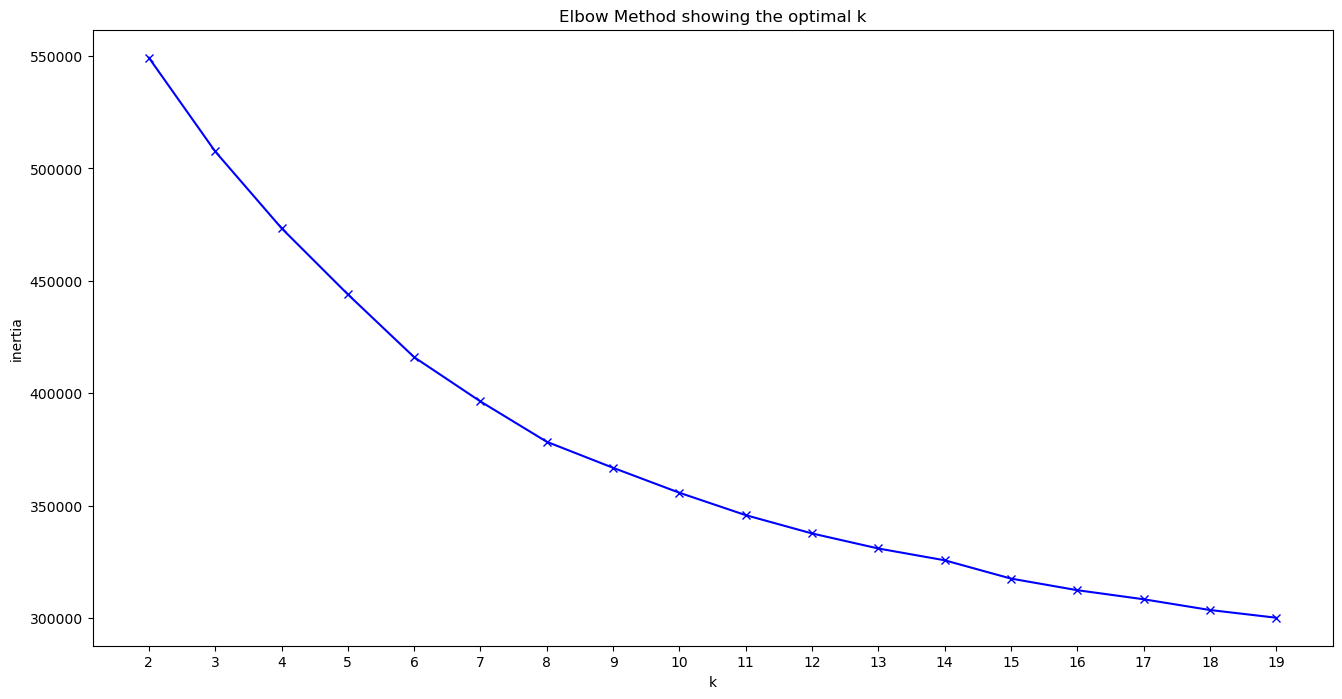

In [130]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_num_audio_feat)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [131]:
import warnings
warnings.filterwarnings('ignore')
from dateutil.parser import parse

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

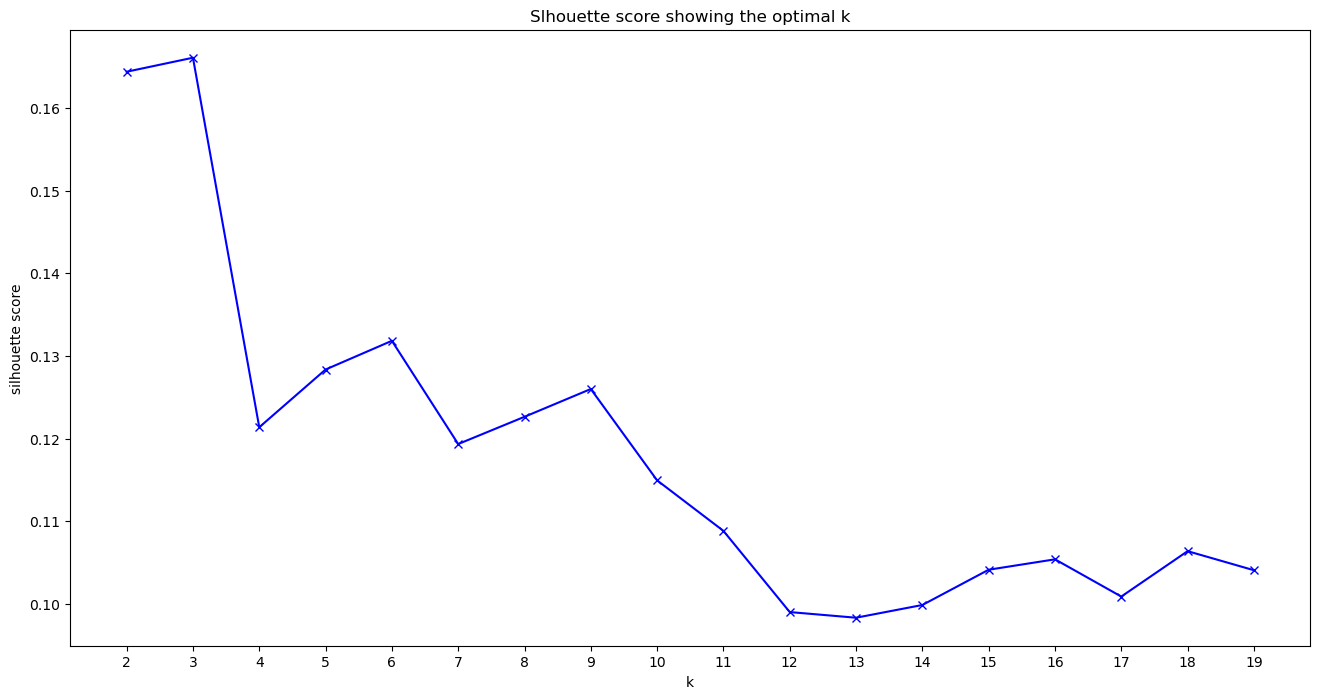

In [133]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_num_audio_feat)
    silhouette.append(silhouette_score(X_scaled_num_audio_feat, kmeans.predict(X_scaled_num_audio_feat)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [134]:
kmeans = KMeans(n_clusters=18, random_state=1234).fit(X_scaled_num_audio_feat)
clusters_1 = kmeans.predict(X_scaled_num_audio_feat)
pd.Series(clusters_1).value_counts().sort_index()

0      189
1     4793
2     5102
3     3018
4     1407
5     3827
6     3983
7     2499
8     1259
9     1240
10    3542
11    3350
12     220
13    3396
14    2142
15    4306
16    2251
17    2062
dtype: int64

In [137]:
import pickle

# Assuming 'kmeans' is your KMeans model
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)


In [149]:
df_w_audio_ft["clusters_1"]=clusters_1

In [150]:
df_w_audio_ft[["track.name","name","song_id",  "clusters_1"]]

track.name            name  \
0                                   Like a Rolling Stone       Bob Dylan   
1                                Smells Like Teen Spirit         Nirvana   
2                         A Day In The Life - Remastered     The Beatles   
3                                 Good Vibrations (Mono)  The Beach Boys   
4                                         Johnny B Goode     Chuck Berry   
...                                                  ...             ...   
64165                           Blue feat. Ilse de Lange        Zucchero   
64167                           Blue feat. Ilse de Lange    Ilse DeLange   
64169  All For Love - From "The Three Musketeers" Sou...     Bryan Adams   
64172  All For Love - From "The Three Musketeers" Sou...           Sting   
64175  All For Love - From "The Three Musketeers" Sou...     Rod Stewart   

                      song_id  clusters_1  
0      3AhXZa8sUQht0UEdBJgpGc           6  
1      3oTlkzk1OtrhH8wBAduVEi           1  
2      3ZFBeIyP41HhnALjxWy1pR          16  
3      5Qt4Cc66g24QWwGP3YYV9y           6  
4      7MH2ZclofPlTrZOkPzZKhK          14  
...                       ...         ...  
64165  583qzYY2ARvSDchyq8PkTF           3  
64167  583qzYY2ARvSDchyq8PkTF           3  
64169  3sDWjYgYzAPUcwzuo6OGs8           6  
64172  3sDWjYgYzAPUcwzuo6OGs8           6  
64175  3sDWjYgYzAPUcwzuo6OGs8           6  

[48586 rows x 4 columns]

In [151]:
df_w_audio_ft.to_csv("clustered_audio_feat.csv", index=False)